## Example of MNIST - read into Numpy array

In [ ]:
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from sklearn.externals.joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
try:
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen

In [ ]:
!pwd

In [ ]:
path_data = '/Users/reshamashaikh/ds/my_repos/pytorch_work/data/raw/'

In [ ]:
!ls -alt $path_data

In [ ]:
""" A function that can read MNIST's idx file format into numpy arrays.

    The MNIST data files can be downloaded from here:
    
    http://yann.lecun.com/exdb/mnist/

    This relies on the fact that the MNIST dataset consistently uses
    unsigned char types with their data segments.
"""

import struct

import numpy as np

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [ ]:
X_train = read_idx(path_data+'train-images-idx3-ubyte')
y_train = read_idx(path_data+'train-labels-idx1-ubyte')

X_test = read_idx(path_data+'t10k-images-idx3-ubyte')
y_test = read_idx(path_data+'t10k-labels-idx1-ubyte')

In [ ]:
print("------------------------")
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("------------------------")
print("X_test: ", y_test.shape)
print("y_test: ", y_test.shape)

In [ ]:
X_train

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.01)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)



---

### reproducing blogpost on logistic regression
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# Logistic Regression (MNIST)
## data:  70000

In [56]:
import time

In [57]:
t0 = time.time()

In [58]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [59]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [60]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [9]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([1.])

In [11]:
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [12]:
predictions = logisticRegr.predict(test_img)

In [13]:
type(predictions[0])

numpy.float64

In [14]:
predictions = predictions.astype(int)

In [15]:
type(predictions[0])

numpy.int64

In [35]:
print(len(predictions))

10000


In [16]:
type(test_lbl[0])

numpy.float64

In [17]:
test_lbl = test_lbl.astype(int)

In [37]:
type(test_lbl[0])
print(len(test_lbl))

10000


In [19]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9134


In [20]:
run_time = time.time() - t0
print('Example run in             : %.3f s' % run_time)

Example run in             : 58.485 s


## Display Misclassified images with Predicted Labels (MNIST)

In [52]:
import numpy as np 
import matplotlib.pyplot as plt

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [53]:
print(len(misclassifiedIndexes))

866


In [54]:
misclassifiedIndexes[0:5]

[11, 16, 20, 27, 55]

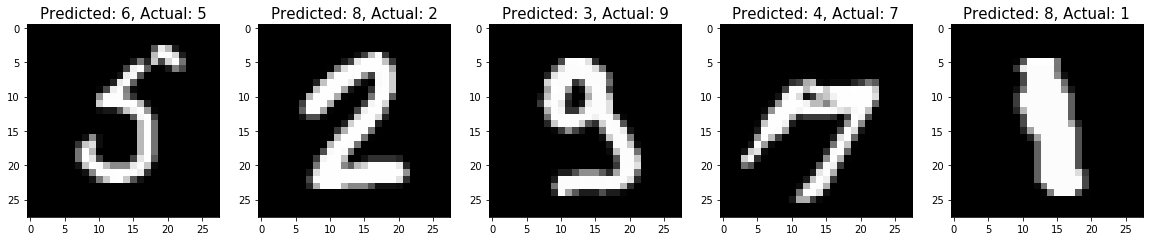

In [55]:
plt.figure(figsize=(20,4))

for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)